In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from IPython.display import display, Math

from lib.qc_extensions import get_ibm_backend
from lib.logic import *

In [2]:
cnf = CNF([
    [V(0), V(1)],
    [V(2, inv=True)]
])

display(Math(cnf.to_latex()))

dj_to_xdj(Disjunction([V(0), V(1), V(2)]))

display(Math(cnf_to_cxf(cnf).to_latex()))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

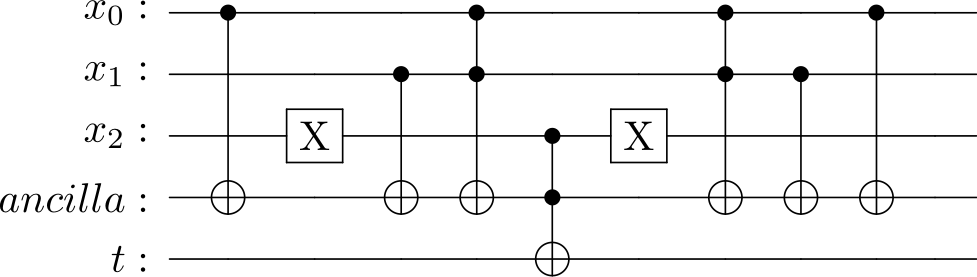

In [3]:
class Oracle(QuantumCircuit):
    def __init__(self):
        x = QuantumRegister(3, name="x")
        ancilla = QuantumRegister(1, name="ancilla")
        target = QuantumRegister(1, name="t")

        super().__init__(x, ancilla, target, name="Oracle")

        self.cx(x[0], ancilla)
        self.cx(x[1], ancilla)
        self.mct([x[0], x[1]], ancilla)
        self.x(x[2])
        self.mct([x[2], ancilla], target)
        self.x(x[2])
        self.mct([x[0], x[1]], ancilla)
        self.cx(x[1], ancilla)
        self.cx(x[0], ancilla)
Oracle().visualize()

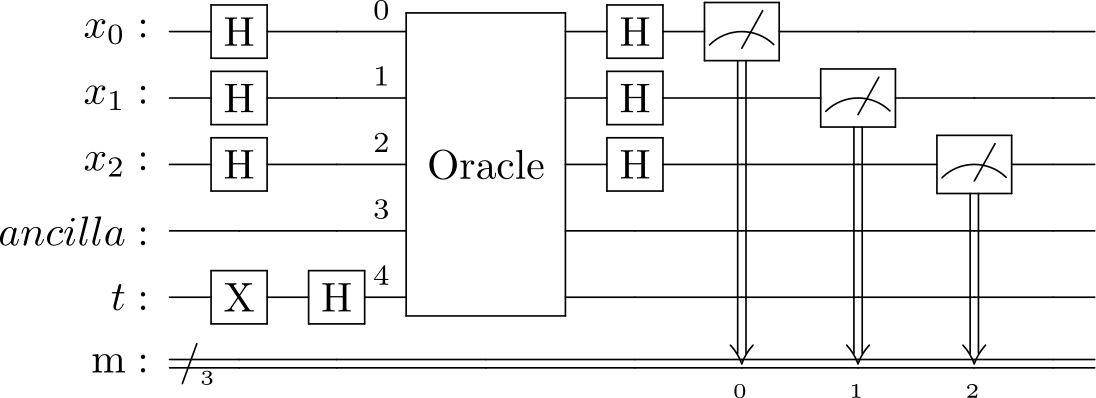

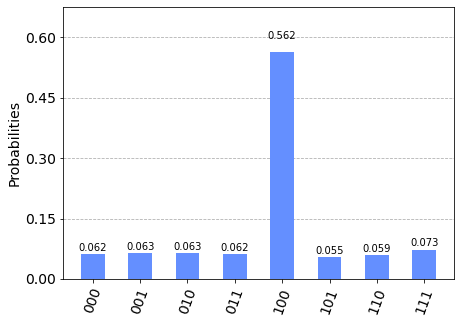

In [4]:
class DJ(QuantumCircuit):
    def __init__(self):
        x = QuantumRegister(3, name="x")
        ancilla = QuantumRegister(1, name="ancilla")
        target = QuantumRegister(1, name="t")
        m = ClassicalRegister(3, name="m")

        super().__init__(x, ancilla, target, m)

        self.x(target)

        for qubit in x:
            self.h(qubit)
        self.h(target)

        oracle = Oracle().to_gate()
        self.append(oracle, [0, 1, 2, 3, 4])

        for qubit in range(3):
            self.h(qubit)

        for i in range(3):
            self.measure(x[i], m[i])

        
dj = DJ()
results = dj.simulate()
display(dj.visualize())
plot_histogram(results.get_counts())

Least busy backend: ibmq_lima
Job Status: job has successfully run
2022-11-29 09:38:37+02:00
{'000': 1055, '001': 432, '010': 350, '011': 292, '100': 779, '101': 453, '110': 339, '111': 300}


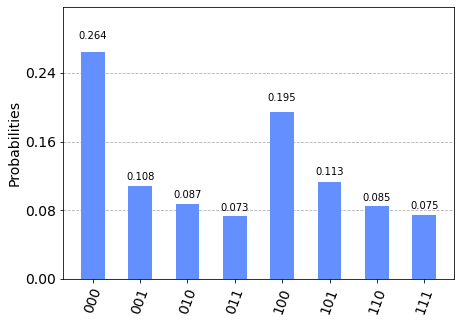

In [5]:
backend = get_ibm_backend(5)
results = dj.run(backend)
print(results.date)
print(results.get_counts())
plot_histogram(results.get_counts())